In [1]:
from numpy import loadtxt
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def dataSetPreProcess():
    file = open('boston/Dataset.data', 'r')
    fileContent = file.read()
    fileContent = fileContent.split("\n")
    print(fileContent[1012])
    DataSet = []
    for i in range(len(fileContent)-1):
        if(i%2==0):
            data1 = fileContent[i]
            data2 = fileContent[i+1]
            data1 = data1.split()
            data2 = data2.split()
            data = data1[0:-1]+data2
            DataSet.append(data)
            
#     print(DataSet[55])
    return DataSet

In [3]:
def splitDataSet(dataSet):
    size = len(dataSet)
    splitIndex = int(size*4/5) + 1
    return dataSet[0:splitIndex], dataSet[splitIndex:]

In [4]:
dataSet = dataSetPreProcess()
trainSet, testSet = splitDataSet(dataSet)

In [5]:
def transformXmultiDimension(trainSet):
    X = np.zeros(shape=(len(trainSet), 14))
    Y = np.zeros(shape=(len(trainSet), 1))
    for i in range(len(trainSet)):
        for j in range(13):
            X[i][j] = trainSet[i][j]
        X[i][13] = 1
        Y[i] = trainSet[i][13]
    return X, Y

In [6]:
trainX, trainY = transformXmultiDimension(trainSet)
testX, testY = transformXmultiDimension(testSet)
print(trainX[52], trainY[222])

[5.3600e-02 2.1000e+01 5.6400e+00 0.0000e+00 4.3900e-01 6.5110e+00
 2.1100e+01 6.8147e+00 4.0000e+00 2.4300e+02 1.6800e+01 3.9690e+02
 5.2800e+00 1.0000e+00] [27.5]


In [7]:
def calculateWeight(X, Y):
    result = np.matmul(X, X.T)
    if ( np.linalg.det(result) == 0):
        inverse = np.linalg.pinv(result)
    else:
        inverse = np.linalg.inv(result)
    W = np.matmul(inverse, X)
    W = np.matmul(W, Y)
    return W

In [8]:
# ------------------------------------------------Q1 PART B-----------------------
W =  calculateWeight(trainX.T, trainY)

In [9]:
def calculateRMSE(W,X ,Y):
    size = len(X)
    RMSE = 0
    for i in range(size):
        y = np.matmul(W.T, X[i])
        error = np.power(Y[i] -y, 2)
        RMSE+=error
    RMSE/=size
    RMSE = math.sqrt(RMSE)
    return RMSE

In [10]:
print(trainX[0].shape)
RMSE = calculateRMSE(W, trainX, trainY)
print("Training RMSE is", RMSE)
RMSE = calculateRMSE(W, testX, testY)
print("Testing RMSE is", RMSE)

(14,)
Training RMSE is 4.768352896282809
Testing RMSE is 5.771794050730155


In [11]:
#---------------------------Select the feature named ‘LSTAT’ for polynomial regression.-------------
trainXCopy = trainX
testXCopy = testX
train13X = trainXCopy[:,12]
test13X = testXCopy[:,12]

In [12]:
def transformXArray(X, m):
    Xnew = np.zeros(shape=(len(X),m+1))
    for i in range(len(X)):
        for j in range(m):
            Xnew[i][m-j-1] = np.power(X[i][0], j+1)
        Xnew[i][m] = 1
    return Xnew

In [13]:
def kFoldCrossValidate(X, Y, K):
    size = X.shape[0]
    d = X.shape[1]
    validRMSE = 0
    trainRMSE = 0
    for k in range(1,K+1):
        end = int((size/K)*k)
        start = int((size/K)*(k-1))
        Xtest = np.empty((end-start, d))
        Ytest = np.empty((end-start, ))
        Xtrain = X
        Ytrain = Y
        Xtest = X[start:end]
        Ytest = Y[start:end]
        for i in range(end-1, start-1, -1):
            Xtrain = np.delete(Xtrain, (i), axis = 0)
            Ytrain = np.delete(Ytrain, (i), axis = 0)            
        W = calculateWeight(Xtrain.T, Ytrain)
        validRMSE+=calculateRMSE(W, Xtest, Ytest)
        trainRMSE+=calculateRMSE(W, Xtrain, Ytrain)
    return validRMSE/K, trainRMSE/K    

In [14]:
train13X = train13X.reshape(405,1)
print(train13X.shape)
print(kFoldCrossValidate(train13X,trainY, 5))

(405, 1)
(19.61126981505364, 19.108289910338105)


In [15]:
Xnew = transformXArray(train13X, 30)
print(Xnew.shape, trainY.shape)

(405, 31) (405, 1)


Degree M = 1 : 6.717916296592021 6.470718138814439
Degree M = 2 : 6.07321093249938 5.730193043476368
Degree M = 3 : 5.785514904099477 5.566886789014768
Degree M = 4 : 5.66495938471939 5.435337997818632
Degree M = 5 : 5.6321669266250725 5.385657985498872
Degree M = 6 : 5.639527245013247 5.375302648620453
Degree M = 7 : 5.632874125377299 5.372515042004851
Degree M = 8 : 6.515430020200336 5.351822825301598
Degree M = 9 : 9.583770351713863 5.343741861952016
Degree M = 10 : 17.90323426128861 5.300706945647177
Degree M = 11 : 23.820151385443957 5.293632309878867
Degree M = 12 : 41.21260434113289 6.094363191611218
Degree M = 13 : 7.86458977247261 5.3227579755815775
Degree M = 14 : 182.53500107505315 5.367105861413904
Degree M = 15 : 208.7020884939418 5.401366691054323
Degree M = 16 : 204.81222125758518 5.307324208614383
Degree M = 17 : 214.2485764638212 5.289585766418457
Degree M = 18 : 172.9318057994793 5.3167533279998285
Degree M = 19 : 172.15239585937528 9.282385781179022
Degree M = 20 : 1

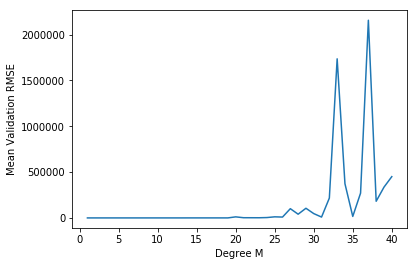

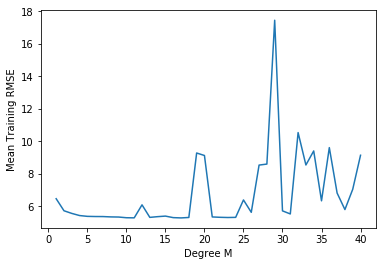

In [39]:
# M = [1,2,3, 4,5,10,15,30]
M = []
vRMSE = []
tRMSE = []
minRMSE = 1000
minDegree = 50
for m in range(1,41):
    M.append(m)
    Xnew = transformXArray(train13X, m)
    validRMSE, trainRMSE = kFoldCrossValidate(Xnew,trainY, 5)
    if(validRMSE< minRMSE):
        minRMSE = validRMSE
        minDegree = m
    print("Degree M =", m, ":", validRMSE, trainRMSE)
    vRMSE.append(validRMSE)
    tRMSE.append(trainRMSE)
    
plt.plot(M, vRMSE)
plt.xlabel("Degree M")
plt.ylabel("Mean Validation RMSE")
plt.show()    


plt.plot(M, tRMSE)
plt.xlabel("Degree M")
plt.ylabel("Mean Training RMSE")
plt.show()  

In [42]:
print(minDegree, minRMSE)

5 5.6321669266250725


RMSE for Degree M = 5 is 5.443192852675363


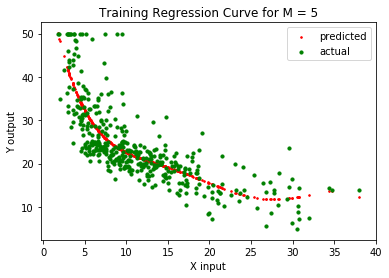

In [57]:
#final regression for degree = 5 on training set
listRMSE = []
# tRMSE = []
m = minDegree
Xnew = transformXArray(train13X, m)
# print(W.shape)
W = calculateWeight(Xnew.T, trainY)
RMSE = calculateRMSE(W,Xnew, trainY)
print("RMSE for Degree M =",m,"is" ,RMSE)
listRMSE.append(RMSE)
Ynew = np.matmul(W.T, Xnew.T)
plt.scatter(Xnew[:,(m-1)], Ynew ,label='predicted', marker='.', color = 'red', s = 10)
plt.scatter(Xnew[:,(m-1)], trainY, label='actual', color = "green", s = 10)
plt.xlabel('X input')
plt.ylabel("Y output")
plt.title('Training Regression Curve for M = '+ str(m))
plt.legend()
plt.show()


 RMSE for Degree M = 5 is 4.081126166127402


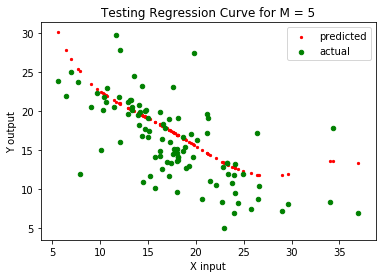

In [56]:

#final regression for degree = 5 on test set set
listRMSE = []
m = minDegree
test13X = test13X.reshape(101,1)
# print(test13X.shape)
Xnew = transformXArray(test13X, m)

RMSE = calculateRMSE(W,Xnew, testY)
print(" RMSE for Degree M =",m,"is" ,RMSE)
listRMSE.append(RMSE)
Ynew = np.matmul(W.T, Xnew.T)
plt.scatter(Xnew[:,(m-1)], Ynew ,label='predicted', marker='.', color = 'red', s = 20)
plt.scatter(Xnew[:,(m-1)], testY, label='actual', color = "green", s = 20)
plt.xlabel('X input')
plt.ylabel("Y output")
plt.title('Testing Regression Curve for M = '+ str(m))
plt.legend()
plt.show()


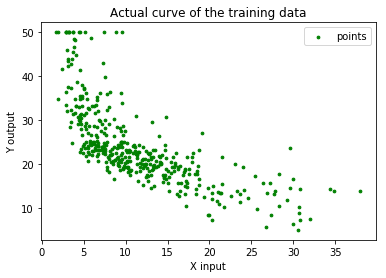

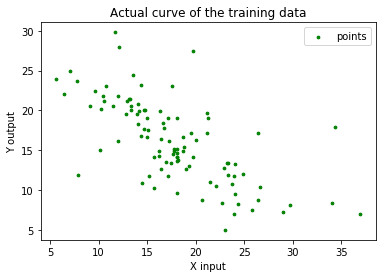

In [35]:
#Original Curve for training points 

plt.scatter(train13X, trainY,label='points', marker='.', color = 'g', s = 30)
plt.xlabel('X input')
plt.ylabel("Y output")
plt.title('Actual curve of the training data')
plt.legend()
plt.show()

#Original Curve for original points 
plt.scatter(test13X, testY,label='points', marker='.', color = 'g', s = 30)
plt.xlabel('X input')
plt.ylabel("Y output")
plt.title('Actual curve of the training data')
plt.legend()
plt.show()

In [58]:
dataSetX, dataSetY = transformXmultiDimension(dataSet)

 RMSE for Degree M = 5 is 823.1080640158799


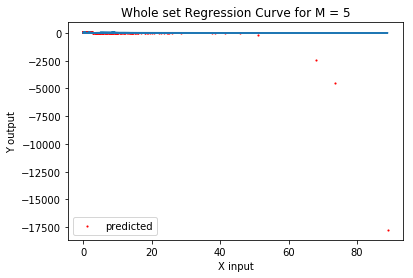

In [74]:
#------------------------- regression on whole dataset (80% + 20%) --------------------------------

listRMSE = []
m = minDegree

Xnew = transformXArray(dataSetX, m)

RMSE = calculateRMSE(W,Xnew, dataSetY)
print(" RMSE for Degree M =",m,"is" ,RMSE)
listRMSE.append(RMSE)
Ynew = np.matmul(W.T, Xnew.T)
plt.scatter(Xnew[:,(m-1)], Ynew ,label='predicted', marker='.', color = 'red', s = 5)
# plt.scatter(Xnew[:,(m-1)], dataSetY, label='actual', color = "green", s = 5)
plt.plot(Xnew[:,(m-1)], dataSetY)
plt.xlabel('X input')
plt.ylabel("Y output")
plt.title('Whole set Regression Curve for M = '+ str(m))
plt.legend()
plt.show()